In [41]:
import requests
import pandas as pd

In [42]:
url = "https://www.coingecko.com/price_charts/1/usd/max.json"
url_headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36"}
data = requests.get(url, headers = url_headers)
data

<Response [200]>

In [43]:
# 取價格及成交量, 資料為Json格式
prices = data.json()['stats']
volumes = data.json()['total_volumes']

In [44]:
# 將資料轉為DataFram, 利用pandas.DataFrame(Data)
DF_Price = pd.DataFrame(data=prices, columns=['date','close'])
DF_Volume = pd.DataFrame(data=volumes, columns=['date','volume'])

In [45]:
# 第一筆為平盤,第二筆開始為前一大的收盤價, 最後 天的收盤捨棄
Open = [DF_Price['close'][0]]
Open.extend(DF_Price['close'][0:-1])

In [46]:
# 算每日最高、低
Close = list(DF_Price['close'])
High = [max(o, c) for o, c in zip(Open, Close)]
Low = [min(o, c) for o, c in zip(Open, Close)]

In [47]:
# 合併為金融資料集
DF_Financil = DF_Price
DF_Financil['open'] = Open
DF_Financil['high'] = High
DF_Financil['low'] = Low
DF_Financil['volume'] = DF_Volume['volume']
DF_Financil.head(10)

,date,close,open,high,low,volume
0,1367107200000,135.30,135.30,135.30,135.30,0.0
1,1367193600000,141.96,135.30,141.96,135.30,0.0
2,1367280000000,135.30,141.96,141.96,135.30,0.0
3,1367366400000,117.00,135.30,135.30,117.00,0.0
4,1367452800000,103.43,117.00,117.00,103.43,0.0
5,1367539200000,91.01,103.43,103.43,91.01,0.0
6,1367625600000,111.25,91.01,111.25,91.01,0.0
7,1367712000000,116.79,111.25,116.79,111.25,0.0
8,1367798400000,118.33,116.79,118.33,116.79,0.0
9,1367884800000,106.40,118.33,118.33,106.40,0.0


In [48]:
# 重排一下Column的順序
cols = DF_Financil.columns.tolist()
print('現有順序：', cols)
cols = ['date', 'open', 'high', 'low', 'close', 'volume']
print('重排順序：', cols)

現有順序： ['date', 'close', 'open', 'high', 'low', 'volume']
重排順序： ['date', 'open', 'high', 'low', 'close', 'volume']


In [49]:
# 重排DataFrame的column順序
DF_Financil = DF_Financil[cols]
DF_Financil.head(10)

,date,open,high,low,close,volume
0,1367107200000,135.30,135.30,135.30,135.30,0.0
1,1367193600000,135.30,141.96,135.30,141.96,0.0
2,1367280000000,141.96,141.96,135.30,135.30,0.0
3,1367366400000,135.30,135.30,117.00,117.00,0.0
4,1367452800000,117.00,117.00,103.43,103.43,0.0
5,1367539200000,103.43,103.43,91.01,91.01,0.0
6,1367625600000,91.01,111.25,91.01,111.25,0.0
7,1367712000000,111.25,116.79,111.25,116.79,0.0
8,1367798400000,116.79,118.33,116.79,118.33,0.0
9,1367884800000,118.33,118.33,106.40,106.40,0.0


In [50]:
# 將Date由秒數轉為日期格式
DF_Financil['date'] = pd.to_datetime(DF_Financil['date'], unit='ms')
DF_Financil.head(10)

,date,open,high,low,close,volume
0,2013-04-28,135.30,135.30,135.30,135.30,0.0
1,2013-04-29,135.30,141.96,135.30,141.96,0.0
2,2013-04-30,141.96,141.96,135.30,135.30,0.0
3,2013-05-01,135.30,135.30,117.00,117.00,0.0
4,2013-05-02,117.00,117.00,103.43,103.43,0.0
5,2013-05-03,103.43,103.43,91.01,91.01,0.0
6,2013-05-04,91.01,111.25,91.01,111.25,0.0
7,2013-05-05,111.25,116.79,111.25,116.79,0.0
8,2013-05-06,116.79,118.33,116.79,118.33,0.0
9,2013-05-07,118.33,118.33,106.40,106.40,0.0


In [51]:
# 將資料集轉為時間序列(time series)
DF_Financil.index = DF_Financil['date']
DF_Financil.head(10)

,date,open,high,low,close,volume
date,,,,,,
2013-04-28,2013-04-28,135.30,135.30,135.30,135.30,0.0
2013-04-29,2013-04-29,135.30,141.96,135.30,141.96,0.0
2013-04-30,2013-04-30,141.96,141.96,135.30,135.30,0.0
2013-05-01,2013-05-01,135.30,135.30,117.00,117.00,0.0
2013-05-02,2013-05-02,117.00,117.00,103.43,103.43,0.0
2013-05-03,2013-05-03,103.43,103.43,91.01,91.01,0.0
2013-05-04,2013-05-04,91.01,111.25,91.01,111.25,0.0
2013-05-05,2013-05-05,111.25,116.79,111.25,116.79,0.0
2013-05-06,2013-05-06,116.79,118.33,116.79,118.33,0.0


# 畫價格線圖量能圖

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
mpl.rcParams["axes.unicode_minus"] = False

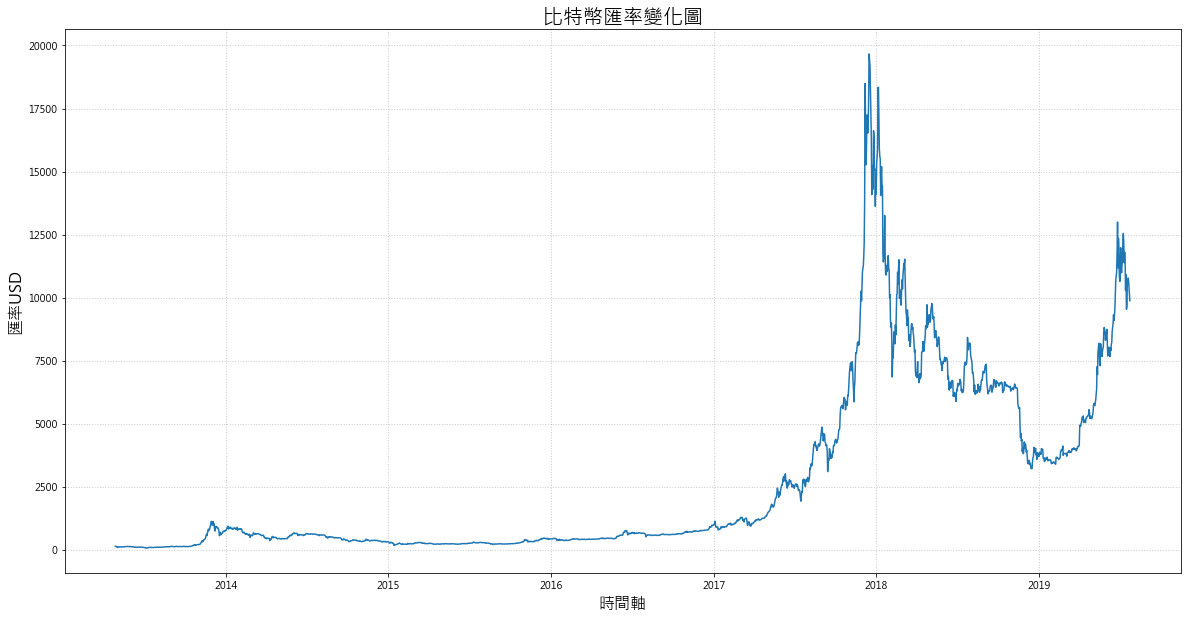

In [53]:
# plot
plt.figure(figsize=(20, 10))

plt.plot(DF_Financil["date"], DF_Financil["close"], ls="-")

plt.grid(True, ls=":", lw=1, color="gray", alpha=0.4)

plt.title("比特幣匯率變化圖", fontsize=20)
plt.ylabel("匯率USD", fontsize=16)
plt.xlabel("時間軸", fontsize=16)

plt.show()

In [54]:
# blockchain.info
url = "https://api.blockchain.info/charts/market-price?timespan=all&format=csv"
data = pd.read_csv(url, encoding='utf8', header=None)

In [55]:
data.head(10)

,0,1
0,2009-01-03 00:00:00,0.0
1,2009-01-06 00:00:00,0.0
2,2009-01-09 00:00:00,0.0
3,2009-01-12 00:00:00,0.0
4,2009-01-15 00:00:00,0.0
5,2009-01-18 00:00:00,0.0
6,2009-01-21 00:00:00,0.0
7,2009-01-24 00:00:00,0.0
8,2009-01-27 00:00:00,0.0
9,2009-01-30 00:00:00,0.0


In [56]:
data.columns = ['datetime', 'usd']
df = pd.DataFrame(data)
df['datetime'] = pd.to_datetime(df['datetime'])
df['usd'] = pd.to_numeric(df['usd'])
df.index = df['datetime']
df.head(10)

,datetime,usd
datetime,,
2009-01-03,2009-01-03,0.0
2009-01-06,2009-01-06,0.0
2009-01-09,2009-01-09,0.0
2009-01-12,2009-01-12,0.0
2009-01-15,2009-01-15,0.0
2009-01-18,2009-01-18,0.0
2009-01-21,2009-01-21,0.0
2009-01-24,2009-01-24,0.0
2009-01-27,2009-01-27,0.0


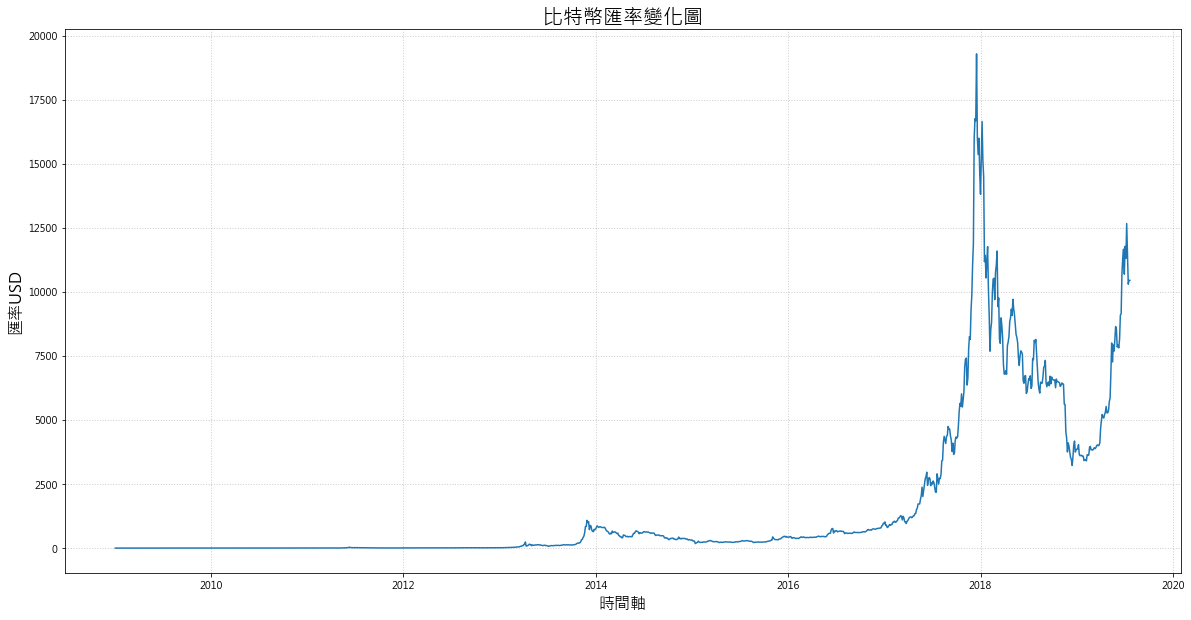

In [57]:
# plot
plt.figure(figsize=(20, 10))

plt.plot(df["datetime"], df["usd"], ls="-")

plt.grid(True, ls=":", lw=1, color="gray", alpha=0.4)

plt.title("比特幣匯率變化圖", fontsize=20)
plt.ylabel("匯率USD", fontsize=16)
plt.xlabel("時間軸", fontsize=16)

plt.show()

In [62]:
# 第一次減半時間點是 2012 年 11 月 28 日，當時價格大約 11 美元
btc_1 = df['2011-11-01':'2013-11-30']
btc_1['miner'] = 0

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
btc_1['miner']['2012-11-28'] = btc_1['usd']['2012-11-28']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


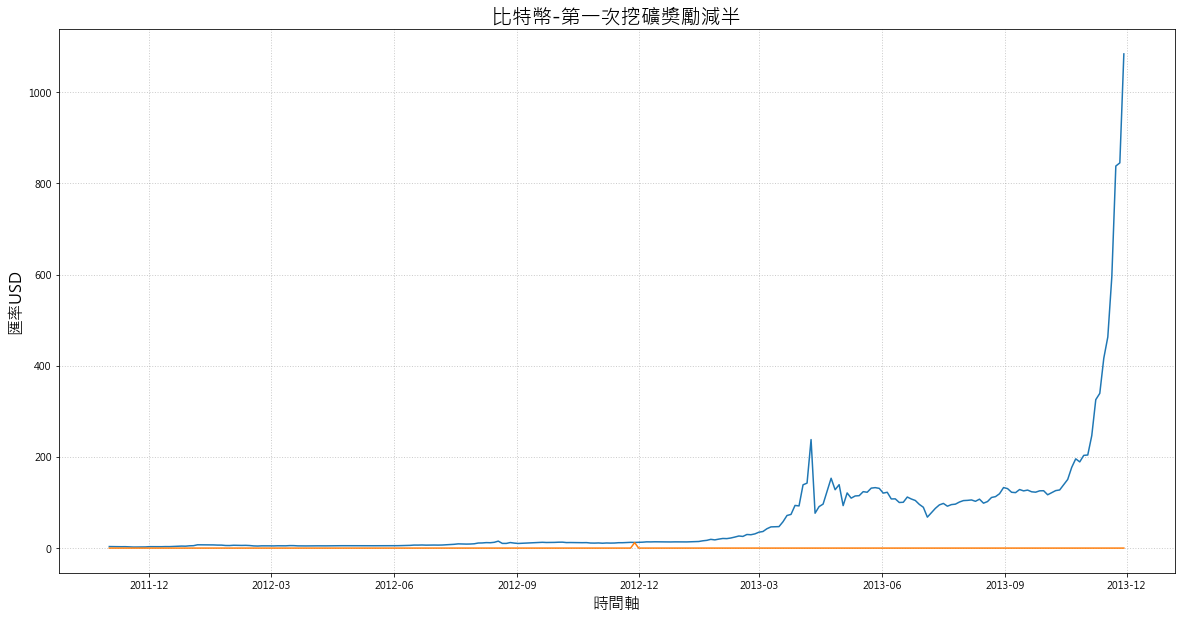

In [64]:
# plot, 
plt.figure(figsize=(20, 10))

plt.plot(btc_1["datetime"], btc_1["usd"], ls="-")
plt.plot(btc_1["datetime"], btc_1["miner"], ls="-")

plt.grid(True, ls=":", lw=1, color="gray", alpha=0.4)

plt.title("比特幣-第一次挖礦奬勵減半", fontsize=20)
plt.ylabel("匯率USD", fontsize=16)
plt.xlabel("時間軸", fontsize=16)

plt.show()

In [65]:
# 第二次減半時間點是 2016 年 7 月 9 日，當時價格大約 741 美元
btc_2 = df['2015-07-01':'2018-12-31']
btc_2['miner'] = 0

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
btc_2['miner']['2016-07-10'] = btc_2['usd']['2016-07-10']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


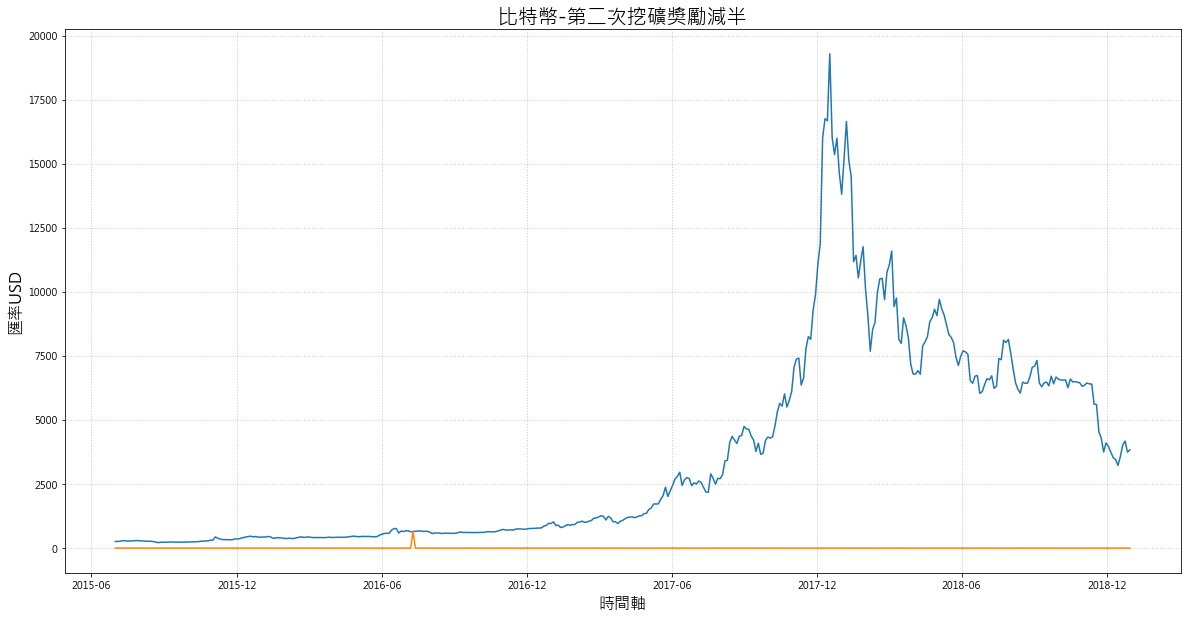

In [67]:
# plot, 
plt.figure(figsize=(20, 10))

plt.plot(btc_2["datetime"], btc_2["usd"], ls="-")
plt.plot(btc_2["datetime"], btc_2["miner"], ls="-")

plt.grid(True, ls=":", lw=1, color="gray", alpha=0.4)

plt.title("比特幣-第二次挖礦奬勵減半", fontsize=20)
plt.ylabel("匯率USD", fontsize=16)
plt.xlabel("時間軸", fontsize=16)

plt.show()

# 第三次挖礦減半
![挖礦](minner.jpg)
![比特幣](bitcoin.jpg)